# AUDiaL: Demographic Report

This notebook summarizes demographic information about the participants that volunteered to evaluate [AUDiaL - Accessible Universal Diagrams through Language](https://github.com/tomurillo/AUDiaL).

The current prototype of AUDiaL was evaluated in a number of sessions with blind or almost blind participants. Two sessions took place as part of [ICC 2019](https://www.icc-camp.info/). Smaller sessions with one participant each were also conducted with blind participants brought together among students and staff from the [Johannes Kepler University Linz](https://www.jku.at/).

Before starting, let us load the required dependencies and utility methods:

In [1]:
import os
from collections import defaultdict
import operator
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

def print_count_dict(count_dict, total_n=0, indent=0):
    """
    Pretty-print a list of the elements given by count_dict
    """
    unique, counts = np.unique(count_dict, return_counts=True)
    count_sord_idx = np.argsort(-counts)
    for k, v in zip(unique[count_sord_idx], counts[count_sord_idx]):
        line = ' ' * indent
        if indent > 0:
            line += '- '
        line += '{}: {} times'.format(k, v)
        if total_n > 0:
            line += " ({:04.2f}%)".format(v*100/total_n)
        print(line + ".")

## Demographic Data

First, participants were given a short online questionnaire in order to collect demographic data before the evaluation took place. Questions included basic personal information such as age and gender, as well as questions about individual experience and habits browsing the Web and interpreting diagrams.

In [2]:
CSV_DIR = 'data'
DEMO_FILE = 'AUDiaL_demographic_anonymized.csv'
demo_data = np.genfromtxt(os.path.join(CSV_DIR, DEMO_FILE), dtype=None, delimiter=',', names=True, encoding=None)
N = demo_data.shape[0]
print('N={} participants.'.format(N))

N=9 participants.


### Age

In [3]:
ages = demo_data[:]['Age']
print('Range: {} to {} years.'.format(np.min(ages), np.max(ages)))
print('Average: {:05.2f} years.'.format(np.mean(ages)))
print('Standard deviation: {:05.2f} years.'.format(np.std(ages)))

Range: 17 to 58 years.
Average: 24.11 years.
Standard deviation: 12.17 years.


### Gender

In [4]:
gender = demo_data[:]['Gender']
male = (gender == 'M').sum()
female = (gender == 'F').sum()
print('Male: {} times ({:04.2f}%).'.format(male, male*100/N))
print('Female: {} times ({:04.2f}%).'.format(female, female*100/N))

Male: 4 times (44.44%).
Female: 5 times (55.56%).


### Visual Impairement

Participants were asked two questions regarding their visual impairement:
<section>
    <h5>Which of the following describes you best?</h5>
    <ul>
        <li>I am totally blind</li>
        <li>I have near total blindness</li>
        <li>I have profound low vision</li>
        <li>I have severe low vision</li>
        <li>I have moderate low vision</li>
        <li>I have near-normal vision</li>
        <li>I have normal vision</li>
    </ul>
</section>

In [5]:
blind = demo_data[:]['Sight']
print_count_dict(blind, N)

Blind: 7 times (77.78%).
Near Blind: 2 times (22.22%).


<section>
    <h5>(If they chose one of the first two answers on the previous question) Since when are you blind?</h5>
    <ul>
        <li>I am blind from birth</li>
        <li>I have been blind for more than 10 years</li>
        <li>I have been blind for between 5 and 10 years</li>
        <li>I have been blind for between 1 and 5 years</li>
        <li>I have been blind for less than 1 year</li>
    </ul>
</section>

In [6]:
blind_since = demo_data[:]['Blind_since']
print('Blind since:')
print_count_dict(blind_since, N, indent=2)

Blind since:
  - Birth: 8 times (88.89%).
  - more than 10 years: 1 times (11.11%).


All participants were totally or functionally blind and had been so since birth or early childhood. Therefore, they were incapable of understanding visually displayed information in diagrams and were thus fitting for the evaluation of AUDiaL.

### Web Browsing Habits

Next, participants were asked to answer three questions related to the ways they surf the Web in their daily lives. These questions were included in order to assess whether participants presented any hindrances that may obstruct their use of the Web tool employed during the evaluation, such as lack of experience browsing web pages or being accustomed to assistive technologies not available in the session room.

<section>
<h5>How long (approximately) have you been browsing Web pages?</h5>
<ul>
    <li>I have no experience browsing the Web</li>
    <li>Less than 1 year</li>
    <li>Between 1 and 5 years</li>
    <li>Between 5 and 10 years</li>
    <li>More than 10 years</li>
</ul>
</section>

In [7]:
wb_exp = demo_data[:]['Web_Browsing_Experience']
print('Web browsing experience:')
print_count_dict(wb_exp, N, indent=2)

Web browsing experience:
  - more than 5 years: 6 times (66.67%).
  - more than 10 years: 3 times (33.33%).


All participants were proficient in navigating the Web, having more than 5 years of experience in doing so. Therefore it can be assumed that any difficulties experienced during the evaluation of AUDiaL were not due to lack of skill of the participants while using the Web prototype.

<section>
<h5>How do you browse Web pages? (choose all that apply):</h5>
<ul>
    <li>Screen reader and text-to-speech software</li>
    <li>Screen reader and a Braille display</li>
    <li>Screen magnifier software</li>
    <li>Other assistive technologies</li>
    <li>I do not use assistive technologies</li>
</ul>
</section>

In [8]:
ass_tech_raw = demo_data[:]['Browsing_Habit']
print('Assistive Technologies (combined counts):')
print_count_dict(ass_tech_raw, N, indent=2)

Assistive Technologies (combined counts):
  - TTS; Braille: 4 times (44.44%).
  - Braille: 2 times (22.22%).
  - TTS: 2 times (22.22%).
  - TTS; Magnifier: 1 times (11.11%).


In [9]:
ass_tech_names = ['TTS', 'Braille', 'Magnifier']
ass_tech = defaultdict(int)
for t in ass_tech_raw:
    for n in ass_tech_names:
        if n in t:
            ass_tech[n] += 1
print('Assistive Technologies (unique counts):')
for t, n in ass_tech.items():
    print('  - {}: {} times ({:04.2f}%)'.format(t, n, n*100/N))

Assistive Technologies (unique counts):
  - TTS: 7 times (77.78%)
  - Braille: 6 times (66.67%)
  - Magnifier: 1 times (11.11%)


All participants used common assistive technologies that were available in the experiment room. One participant reported using magnifier software for browsing the Web. However, her very low vission made it implausible for her to be able to correctly interprent diagrams by means of sight. Moreover, the diagrams used during the evaluation session were not displayed to the users in a visual manner at any time.

<h5>Which screen reader (if any) do you use?</h5>

In [10]:
sreader_raw = demo_data[:]['Screen_Reader']
sreader_raw_split = []
for s in sreader_raw:
    sreader_raw_split.extend(s.split(';'))
sreaders_names = ['nvda', 'jaws', 'voiceover']
sreaders = defaultdict(int)
for sr in sreader_raw_split:
    sr_norm = sr.lower().strip()
    if sr_norm in sreaders_names:
        sreaders[sr_norm] += 1
print('Screen Readers:')
for s, n in sreaders.items():
    print('  - {}: {} times ({:04.2f}%)'.format(s, n, n*100/N))

Screen Readers:
  - jaws: 5 times (55.56%)
  - nvda: 8 times (88.89%)
  - voiceover: 1 times (11.11%)


All desktop screen readers reported by the partipants (NVDA and Jaws) were pre-installed on the computers employed during the evaluation sessions.

### Diagram Knowledge and Experience

Lastly, participants were asked about their knowledge on diagrams, common accessibility features of diagrams they encounter online, and their preferred means of accessing diagrams.

<section>
<h5>Which of these diagram types do you know about?</h5>
<ul>
    <li>Bar Chart</li>
    <li>Histogram</li>
    <li>Pie Chart</li>
    <li>Line Chart</li>
    <li>Scatterplot</li>
    <li>Area Chart</li>
    <li>Link Diagram (also known as graph)</li>
    <li>Group Diagrams (for example, Euler diagrams)</li>
    <li>Which other diagram types do you know? (free text input)</li>
</ul>
</section>

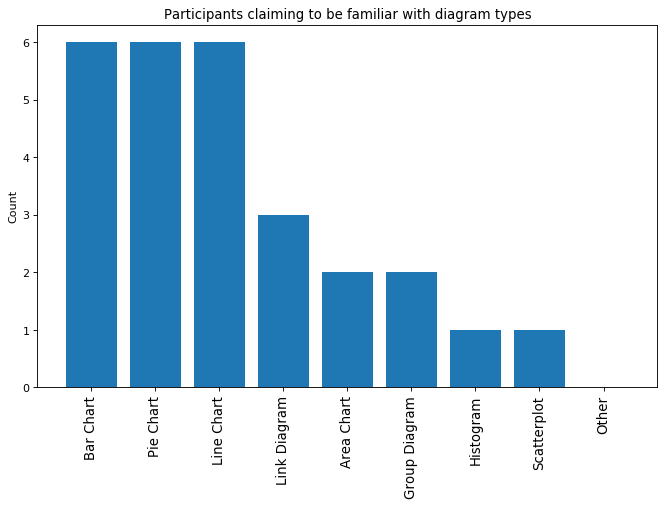

In [11]:
diag_names = ['Bar_Chart', 'Histogram', 'Pie_Chart', 'Line_Chart', 'Scatterplot', 'Area_Chart', 'Link_Diag', 'Group_Diag', 'Other']
diag_counts = {}
for d in diag_names:
    diag_counts[d] = (demo_data[:][d] == 'Y').sum()
diag_counts_sort = sorted(diag_counts.items(), key=operator.itemgetter(1), reverse=True)
x = np.arange(len(diag_names))
y = []
xticks = []
for k, v in diag_counts_sort:
    y.append(v)
    xticks.append(k.replace('_', ' ').replace('Diag', 'Diagram'))
fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x, y)
plt.xticks(x, xticks)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Count')
plt.title('Participants claiming to be familiar with diagram types')
plt.show()

In the figure above it can be observed how the majority of participants are familiar with three very common statistical diagrams, namely bar charts, pie charts, and line charts. On the other hand, less than half of the participants have dealt with link diagrams, group diagrams, histograms, and scatterplots in their lifetimes. Not a single participant was able to name other kinds of diagrams. This may be due to the fact that participants felt like they had to complete the questionnaire in a short time, even though they were not given any time constrain to fill it in during the experiment sessions.

The fact that participants are most familiar with bar and line charts is of great benefit for the evaluation, as the diagrams being employed are precisely of these two types. We can therefore assume that, for most participants, answering the evaluation questions is not hindered by them failing to realize the purpose of using diagrammatic representations of data in the first place.

<section>
<h5>How often do you encounter diagrams on Web pages?</h5>
<ul>
    <li>Never</li>
    <li>Almost never (less than 5% of visited Web pages)</li>
    <li>Not very often (less than 15% of visited Web pages)</li>
    <li>Often (between 15% and 25% of visited Web pages)</li>
    <li>Very often (more than 25% of visited Web pages)</li>
</ul>
</section>

In [12]:
diag_freq = demo_data[:]['Diagram_Frequency']
print('Frequency with which diagrams are encountered on websites:')
print_count_dict(diag_freq, N, indent=2)

Frequency with which diagrams are encountered on websites:
  - <15% of Websites: 5 times (55.56%).
  - Almost Never: 2 times (22.22%).
  - <5% of Websites: 1 times (11.11%).
  - Never: 1 times (11.11%).


Most users encounter diagrams on less than 15% of the websites they visit i.e. 'not very often'. 15% of visited websites is nevertheless a high frequency, given that very often blind web users completely skip diagrams during navigation and may not remember having encountered them.

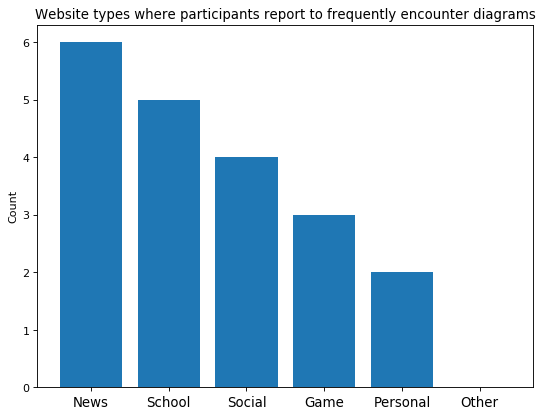

In [18]:
web_names = ['News', 'School', 'Social', 'Personal', 'Game', 'Other']
web_counts = {}
for n in web_names:
    web_counts[n] = (demo_data[:][n] == 'Y').sum()
web_counts_sort = sorted(web_counts.items(), key=operator.itemgetter(1), reverse=True)
x = np.arange(len(web_names))
y = []
xticks = []
for k, v in web_counts_sort:
    y.append(v)
    xticks.append(k)
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x, y)
plt.xticks(x, xticks)
plt.xticks(fontsize=12)
plt.ylabel('Count')
plt.title('Website types where participants report to frequently encounter diagrams')
plt.show()

In [14]:
alt_freq = demo_data[:]['Alt_Text']
print('Frequency with which an alt-text attribute is encountered on online diagrams:')
print_count_dict(alt_freq, N, indent=2)

Frequency with which an alt-text attribute is encountered on online diagrams:
  - Almost never: 3 times (33.33%).
  - Never: 3 times (33.33%).
  - Sometimes: 2 times (22.22%).
  - Most times: 1 times (11.11%).


In [15]:
longdesc_freq = demo_data[:]['Longdesc']
print('Frequency with which a long description accompanies online diagrams:')
print_count_dict(longdesc_freq, N, indent=2)

Frequency with which a long description accompanies online diagrams:
  - Almost never: 5 times (55.56%).
  - Never: 4 times (44.44%).


In [16]:
tactile_freq = demo_data[:]['Tactile_Freq']
print('Frequency with tactile diagrams are read:')
print_count_dict(tactile_freq, N, indent=2)

Frequency with tactile diagrams are read:
  - <5 times: 3 times (33.33%).
  - Few times/year: 3 times (33.33%).
  - Never: 2 times (22.22%).
  - <10 times: 1 times (11.11%).


In [17]:
alt_preferred = demo_data[:]['Preferred_alt']
print('Preferred alternative means for accessing diagrams:')
print_count_dict(alt_preferred, N, indent=2)

Preferred alternative means for accessing diagrams:
  - Text description: 5 times (55.56%).
  - Table: 2 times (22.22%).
  - Tactile copy: 2 times (22.22%).
